## 1. 분류와 회귀
#### 분류
       * 정의 : 클래스 레이블 중 하나로 구분  
       * 이진 분류 : 두 개의 클래스로 분류  
       * 다중 분류 : 셋 이상의 클래스로 분류  

#### 회귀
       * 정의 : 독립변수를 통한 종속변수의 예측

## 2. 일반화, 과대적합, 과소적합
    * 일반화 : 모델이 처음보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 일반화 되었다고 한다  
    * 과대적합 : 지나치게 훈련 데이터에 치우처진 모델(훈련 세트의 점수가 테스트 세트 점수보다 지나치게 높음)
    * 과소적합 : 지나치게 간단한 모델을 선택하는 것

## 3. 모델 복잡도와 데이터셋 크기의 관계
    * 데이터셋에 다양한 데이터 포인트가 많을수록 과대적합 없이 더 복잫반 모델을 만들 수 있음
    * 같은 데이터 포인트를 중복하거나 매우 비슷한 데이터를 모으는 것은 않좋음

## 4. 지도 학습 알고리즘

In [1]:
# 라이브러리
import mglearn
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

분류 : make_forge() 함수

X.Shape (26, 2)


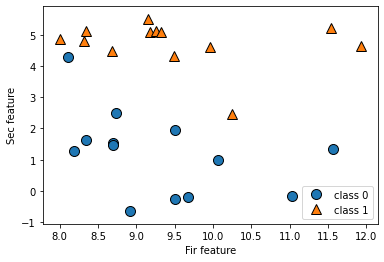

In [2]:
# 데이터 셋 생성
# forge() 함수
X, y = mglearn.datasets.make_forge()

# 산점도 시각화
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.legend(['class 0', 'class 1'], loc = 4)
plt.xlabel('Fir feature')
plt.ylabel('Sec feature')
print("X.Shape", X.shape)

 데이터셋이 26개의 데이터 포인트와 2개의 특성을 가진다

### K - 최근접 이웃 분류

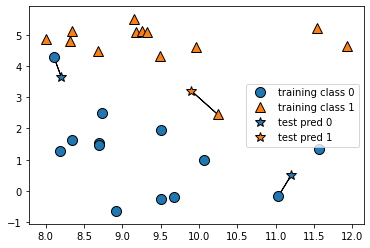

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors= 1)

새로운 데이터는 가장 가까운 데이터 포인트(최근접 이웃)을 기준으로 분류

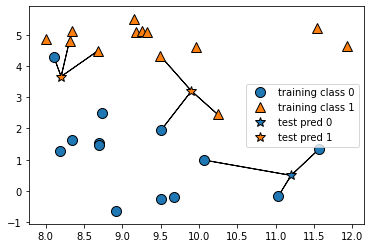

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors= 3)

n_neighbors = n 의 n 값을 조정하여 이웃 값을 초정할 수 있다.  
위의 예시의 경우 가장 왼쪽의 데이터의 예측이 달라진 것을 알 수 있다.

---

KNeighborsClassifier 분석

In [14]:
# 훈련, 테스트용 데이터 분리
from sklearn.model_selection import train_test_split
X, y= mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 0
)

In [16]:
# 모델 생성 (이웃 수 : 3)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [17]:
# 모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
# 테스트 데이터 예측
print("테스트 세트 예측 :", clf.predict(X_test))

테스트 세트 예측 : [1 0 1 0 1 0 0]


In [21]:
# 모델 평가
print("테스트 세트 정확도 : 약 {:.2f}%".format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 약 0.86%


결정 경계 확인

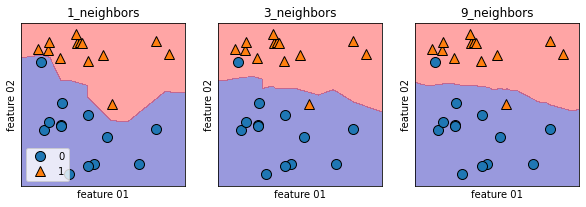

In [28]:
# 한 화면에 그래를 여러개 그릴 수 있도록 설정
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

# 1, 3, 9에서
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 각각의 n_neighbors값으로 모델 생성 및 훈련
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)

    # 각각의 영역 표시
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax=ax, alpha = .4)

    # 각각 산점도 그래기
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)

    # 각각 타이틀 그리기
    ax.set_title("{}_neighbors".format(n_neighbors))

    # 각각 x라벨, y라벨 적기
    ax.set_xlabel('feature 01')
    ax.set_ylabel('feature 02')
    
# 첫번째 그래프에만 라벨 명 적기
axes[0].legend(loc = 3)

이웃의 수를 적게 사용할수록 모델의 복잡도는 상승  
이웃의 수를 많이 사용할수록 모델의 복잡도는 하락  
* 만약 이웃의 수가 테스트 포인트와 같은 값이 되면 가장 많은 데이터 포인트를 가진 클래스가 예측값이 된다

회귀 : wave() 함수를 사용한 회귀 알고리즘 설명

Text(0, 0.5, 'target')

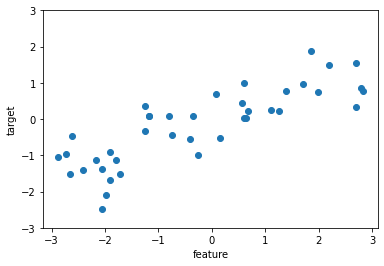

In [34]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('feature')
plt.ylabel('target')

저차원 데이터셋 : 특성이 적은 데이터셋  
고차원 데이터셋 : 특성이 많은 데이터셋

---

k-최근접 이웃 회귀

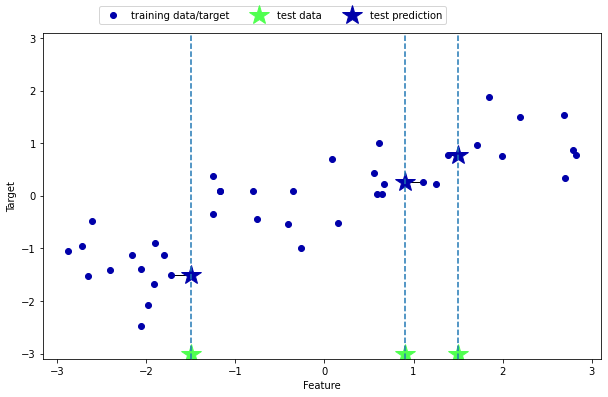

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

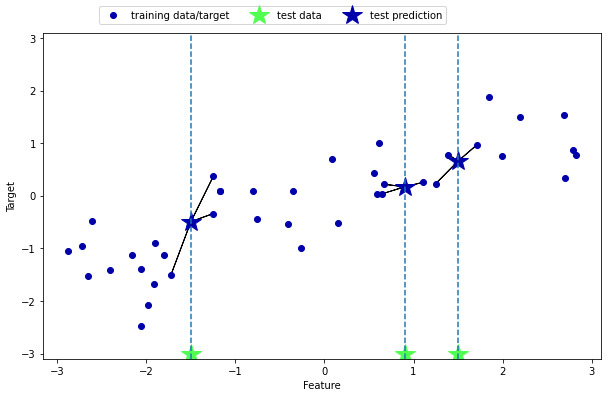

In [32]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

설정한 최근접 이웃 수 사이의 평균 값으로 예측된다

KNeighborsRegressor

In [35]:
from sklearn.neighbors import KNeighborsRegressor

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눈다
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 0
)

# 이웃의 수를 3으로 하여 모델 생성
reg = KNeighborsRegressor(n_neighbors=3)
# 모델 훈련
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [37]:
# 모델 예측
print("테스트 세트 예측 :\n", reg.predict(X_test))

테스트 세트 예측 :
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [40]:
# 모델 평가
print("테스트 세트 R^2 : {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2 : 0.83


모델의 예측도가 83% 정도로 비교적 정확도가 높은 편임

#### k-NN 장단점
* 장점
    * 이해하기 쉬움  
    * 쉽게 좋은 성능 발휘  
    * 더 복잡한 방법을 시작하기에 좋은 시작점
* 단점
    * 복잡한 데이터의 경우 예측 시간이 오래걸림
    * 전처리가 어려움
    * 대용량 데이터에는 잘 작동하지 않음

---

선형 모델

## 분류 : 유방암 데이터  
scikit-learn에 있는 유방암 데이터 셋 확인

In [4]:
# 필요한 라이브러리 로딩
from sklearn.datasets import load_breast_cancer
# 데이터 로딩
cancer = load_breast_cancer()
# 데이터의 key 값들 확인
print("cancer.key() :\n", cancer.keys())

cancer.key() :
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
# 데이터셋 확인
print("유방암 데이터의 형태 : ", cancer.data.shape)

유방암 데이터의 형태 :  (569, 30)


569개의 데이터 포인트와 30개의 특성을 가진 데이터셋임

In [6]:
# target 확인
print("클래스별 샘플 개수 :\n",
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수 :
 {'malignant': 212, 'benign': 357}


데이터는 악성(malignant)은 212개, 양성(benign)은 357개로 구성되어있다.

In [7]:
# 데이터의 특성 확인
print("특성 이름 :\n",
cancer.feature_names)

특성 이름 :
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


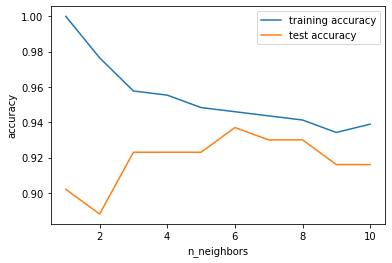

In [30]:
# 데이터 설정
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

# 정확도를 저장할 리스트 설정
training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors 적용
neighbors_settings = range(1,11)

# 각각의 이웃값에 대한 모델 생성 후 정확도 확인
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    # 모델 훈련
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 테스트 세트 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

# 각각의 정확도를 시각화
plt.plot(neighbors_settings, training_accuracy, label = 'training accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()

그래프를 보면 이웃값이 하나인 경우 훈련 데이터에서는 정확도가 100% 지만 테스트에서는 점수가 낮은 과대적합 상태인 것을 볼 수 있다.  
이웃값이 8이 넘어가는 경우 다시 테스트 점수가 떨어지는 것을 알 수 있다.  
따라서 6정도의 이웃값을 정하는게 과대적합과 과소적합의 문제를 해결할 수 있다.

## 회귀 : 보스턴 주택가격 데이터

In [8]:
# 데이터 불러오기
from sklearn.datasets import load_boston
boston = load_boston()

# 데이터 형태 확인
print("데이터의 형태 :", boston.data.shape)

데이터의 형태 : (506, 13)


일반 보스턴 주택가격 데이터 외의 특성끼리 곱하여 의도적으로 확장된 확장 보스턴 주택가격 데이터로 호출

In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.Shape", X.shape)

X.Shape (506, 104)
